In [1]:
#libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import data
data_dir = "data/"

df = pd.read_csv(data_dir + "food_crises_cleaned.csv")
df["date"] = pd.to_datetime(df["year_month"], format="%Y_%m")
print(len(df['district'].unique()))
df.set_index(["date", "district_code"], inplace=True)

#drop columns without climate, time or ipc data
df = df[["ipc", "ndvi_mean", "ndvi_anom", "rain_mean", "rain_anom", "et_mean", "et_anom"]]
df.info()

78
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12324 entries, (Timestamp('2007-01-01 00:00:00'), 74) to (Timestamp('2020-02-01 00:00:00'), 151)
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ipc        3042 non-null   float64
 1   ndvi_mean  12324 non-null  float64
 2   ndvi_anom  12324 non-null  float64
 3   rain_mean  12324 non-null  float64
 4   rain_anom  12324 non-null  float64
 5   et_mean    12324 non-null  float64
 6   et_anom    12324 non-null  float64
dtypes: float64(7)
memory usage: 718.2 KB


In [2]:
df.head()

,,ipc,ndvi_mean,ndvi_anom,rain_mean,rain_anom,et_mean,et_anom
date,district_code,,,,,,,
2007-01-01,74,NaN,0.345851,114.3253,0.253903,-0.107226,0.671249,0.048880
2007-02-01,74,NaN,0.307600,119.8153,1.018789,0.133927,0.129184,-0.457928
2007-03-01,74,NaN,0.278344,110.3800,2.001045,-2.164728,1.025460,-0.590175
2007-04-01,74,NaN,0.303320,102.3160,12.831140,-0.332849,3.846809,-1.845536
2007-05-01,74,NaN,0.413716,97.1873,19.274320,0.288466,8.316274,-2.972735


In [3]:
#set lag options
lag_columns = ["ndvi_mean", "ndvi_anom", "rain_mean", "rain_anom", "et_mean", "et_anom"]
last_lag = 12 #total months of lagged data

In [4]:
#create lagged variables

for lag in range(1, last_lag+1):
    for column in lag_columns:
        lag_column = f"{column}_lag{lag}"
        df[lag_column] = df[column].shift(lag)

for column in lag_columns:
    lag0_column = f"{column}_lag0"
    df.rename(columns={column: lag0_column}, inplace=True)
df.columns

Index(['ipc', 'ndvi_mean_lag0', 'ndvi_anom_lag0', 'rain_mean_lag0',
       'rain_anom_lag0', 'et_mean_lag0', 'et_anom_lag0', 'ndvi_mean_lag1',
       'ndvi_anom_lag1', 'rain_mean_lag1', 'rain_anom_lag1', 'et_mean_lag1',
       'et_anom_lag1', 'ndvi_mean_lag2', 'ndvi_anom_lag2', 'rain_mean_lag2',
       'rain_anom_lag2', 'et_mean_lag2', 'et_anom_lag2', 'ndvi_mean_lag3',
       'ndvi_anom_lag3', 'rain_mean_lag3', 'rain_anom_lag3', 'et_mean_lag3',
       'et_anom_lag3', 'ndvi_mean_lag4', 'ndvi_anom_lag4', 'rain_mean_lag4',
       'rain_anom_lag4', 'et_mean_lag4', 'et_anom_lag4', 'ndvi_mean_lag5',
       'ndvi_anom_lag5', 'rain_mean_lag5', 'rain_anom_lag5', 'et_mean_lag5',
       'et_anom_lag5', 'ndvi_mean_lag6', 'ndvi_anom_lag6', 'rain_mean_lag6',
       'rain_anom_lag6', 'et_mean_lag6', 'et_anom_lag6', 'ndvi_mean_lag7',
       'ndvi_anom_lag7', 'rain_mean_lag7', 'rain_anom_lag7', 'et_mean_lag7',
       'et_anom_lag7', 'ndvi_mean_lag8', 'ndvi_anom_lag8', 'rain_mean_lag8',
       'rain_ano

In [5]:
#drop rows that contain NAN lagged
lagged_index_NaN = []
for i in range(last_lag):
    lagged_index_NaN.append(df.index[i][0])

print(lagged_index_NaN)
df = df.drop(lagged_index_NaN)
df.head()

[Timestamp('2007-01-01 00:00:00'), Timestamp('2007-02-01 00:00:00'), Timestamp('2007-03-01 00:00:00'), Timestamp('2007-04-01 00:00:00'), Timestamp('2007-05-01 00:00:00'), Timestamp('2007-06-01 00:00:00'), Timestamp('2007-07-01 00:00:00'), Timestamp('2007-08-01 00:00:00'), Timestamp('2007-09-01 00:00:00'), Timestamp('2007-10-01 00:00:00'), Timestamp('2007-11-01 00:00:00'), Timestamp('2007-12-01 00:00:00')]


C:\Users\20202182\AppData\Local\Temp\ipykernel_3436\473862676.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(lagged_index_NaN)


,,ipc,ndvi_mean_lag0,ndvi_anom_lag0,rain_mean_lag0,rain_anom_lag0,et_mean_lag0,et_anom_lag0,ndvi_mean_lag1,ndvi_anom_lag1,rain_mean_lag1,...,rain_mean_lag11,rain_anom_lag11,et_mean_lag11,et_anom_lag11,ndvi_mean_lag12,ndvi_anom_lag12,rain_mean_lag12,rain_anom_lag12,et_mean_lag12,et_anom_lag12
date,district_code,,,,,,,,,,,,,,,,,,,,,
2008-01-01,74,NaN,0.279938,92.53691,0.355840,-0.005289,0.601862,-0.020508,0.372313,90.02061,0.598350,...,1.018789,0.133927,0.129184,-0.457928,0.345851,114.3253,0.253903,-0.107226,0.671249,0.048880
2008-02-01,74,NaN,0.230924,89.94880,0.655094,-0.229767,0.084795,-0.502316,0.279938,92.53691,0.355840,...,2.001045,-2.164728,1.025460,-0.590175,0.307600,119.8153,1.018789,0.133927,0.129184,-0.457928
2008-03-01,74,NaN,0.237657,94.24529,4.988573,0.822800,1.051219,-0.564416,0.230924,89.94880,0.655094,...,12.831140,-0.332849,3.846809,-1.845536,0.278344,110.3800,2.001045,-2.164728,1.025460,-0.590175
2008-04-01,74,NaN,0.302844,102.15550,11.441550,-1.722431,6.306763,0.614419,0.237657,94.24529,4.988573,...,19.274320,0.288466,8.316274,-2.972735,0.303320,102.3160,12.831140,-0.332849,3.846809,-1.845536
2008-05-01,74,NaN,0.474265,111.41090,14.280040,-4.705816,12.007060,0.718046,0.302844,102.15550,11.441550,...,19.101750,0.161285,18.794820,1.762026,0.413716,97.1873,19.274320,0.288466,8.316274,-2.972735


In [6]:
#drop ipc NaN rows
df = df[df['ipc'].notna()]
df.head()

,,ipc,ndvi_mean_lag0,ndvi_anom_lag0,rain_mean_lag0,rain_anom_lag0,et_mean_lag0,et_anom_lag0,ndvi_mean_lag1,ndvi_anom_lag1,rain_mean_lag1,...,rain_mean_lag11,rain_anom_lag11,et_mean_lag11,et_anom_lag11,ndvi_mean_lag12,ndvi_anom_lag12,rain_mean_lag12,rain_anom_lag12,et_mean_lag12,et_anom_lag12
date,district_code,,,,,,,,,,,,,,,,,,,,,
2009-07-01,74,2.0,0.515550,82.73602,13.686190,-9.698671,14.027670,-7.561892,0.456028,81.84614,11.387950,...,20.902450,-3.071709,20.504900,-2.272952,0.645395,103.57360,17.978830,-5.406026,18.24900,-3.340564
2009-10-01,74,2.0,0.606967,100.22870,11.130940,-6.215118,18.347970,-0.177359,0.641997,102.47710,22.098330,...,4.201064,-2.581531,6.837251,-5.897221,0.609554,100.65580,18.545200,1.199140,16.41789,-2.107441
2010-01-01,74,1.0,0.253501,83.79816,0.293134,-0.068916,0.167976,-0.454393,0.309300,74.78490,0.930444,...,1.086280,0.201140,0.646836,0.059724,0.327792,108.35580,0.394105,0.032055,0.69041,0.068040
2010-04-01,74,2.0,0.227561,76.68565,7.614567,-5.549418,1.413454,-4.222910,0.218581,86.85130,3.486286,...,8.197217,-10.788640,17.631350,6.342342,0.446831,150.57710,20.585710,7.421724,12.46824,6.831872
2010-07-01,74,2.0,0.592324,95.05682,32.513120,9.128263,19.934490,-1.655068,0.507821,91.14177,16.842910,...,11.407860,-12.566300,17.725280,-5.052566,0.515550,82.73602,13.686190,-9.698671,14.02767,-7.561892


In [7]:
correlation = pd.DataFrame(columns = [],
        index = lag_columns)
correlation

""
ndvi_mean
ndvi_anom
rain_mean
rain_anom
et_mean
et_anom


In [8]:
for lag in range(last_lag+1):
    correlation_column = []
    for variable in lag_columns:
        variable_lag = f"{variable}_lag{lag}"
        correlation_column.append(df["ipc"].corr(df[variable_lag]))
    print(correlation_column)
    correlation[lag] = correlation_column

[-0.021315564685819525, 0.20891030075155867, 0.0074117223350643035, 0.08676994172028248, -0.05585106952724963, 0.06822660724406071]
[-0.1260195873150705, 0.13281434294218394, 0.001932136621512678, 0.08346668990750072, -0.13964328629259604, -0.025748797754359242]
[-0.20988537365508678, 0.15485738438396485, -0.08979312953663873, 0.05732319234040248, -0.22187168643490843, -0.009684360207166523]
[-0.20089610466028324, 0.1298552260958019, -0.24599352927507662, -0.022999788644729752, -0.23987387999948503, 0.03030456208413341]
[-0.18779536961068252, 0.1954834245845369, -0.1759181431893049, 0.020384298693402407, -0.2058794157215239, 0.04888613457056818]
[-0.1918879432730892, 0.11006852675323416, -0.1482660060365129, 0.07392115311571684, -0.22126738945466545, -0.05462362972203516]
[-0.10949277867524865, 0.0842929506151416, -0.16475777678443443, -0.040007791630307606, -0.13936213691056618, 0.007166918394865902]
[-0.0071039361066432645, 0.1819148815441295, -0.09141589601237335, -0.012465636382468

In [9]:
correlation

,0,1,2,3,4,5,6,7,8,9,10,11,12
ndvi_mean,-0.021316,-0.126020,-0.209885,-0.200896,-0.187795,-0.191888,-0.109493,-0.007104,0.037876,0.045992,0.020961,-0.001273,-0.035368
ndvi_anom,0.208910,0.132814,0.154857,0.129855,0.195483,0.110069,0.084293,0.181915,0.221999,0.102639,0.080734,0.152980,0.142219
rain_mean,0.007412,0.001932,-0.089793,-0.245994,-0.175918,-0.148266,-0.164758,-0.091416,0.002324,0.048901,0.098888,0.076448,0.001066
rain_anom,0.086770,0.083467,0.057323,-0.023000,0.020384,0.073921,-0.040008,-0.012466,0.136373,0.083377,0.032711,0.067701,0.070654
et_mean,-0.055851,-0.139643,-0.221872,-0.239874,-0.205879,-0.221267,-0.139362,-0.063400,-0.023787,0.013258,0.035342,-0.013702,-0.058580
et_anom,0.068227,-0.025749,-0.009684,0.030305,0.048886,-0.054624,0.007167,0.109663,0.124868,0.042272,0.062916,0.081430,0.062361


[Text(0.5, 23.52222222222222, 'Lag (in months)'),
 Text(50.58159722222221, 0.5, 'Variable'),
 Text(0.5, 1.0, 'Cross correlation between IPC and climate variables')]

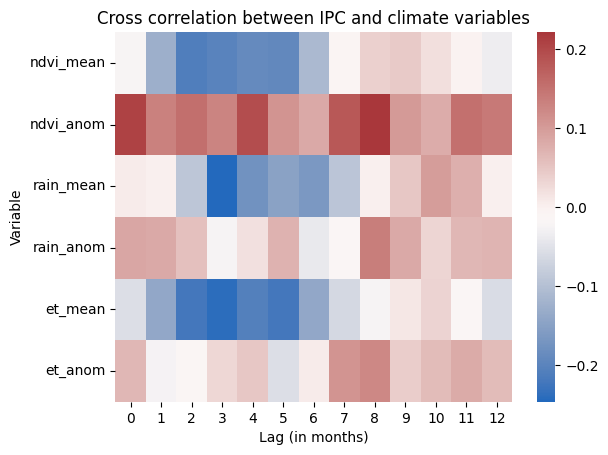

In [10]:
s = sns.heatmap(correlation, annot=False, cmap="vlag")
s.set(xlabel="Lag (in months)", ylabel="Variable", title="Cross correlation between IPC and climate variables")

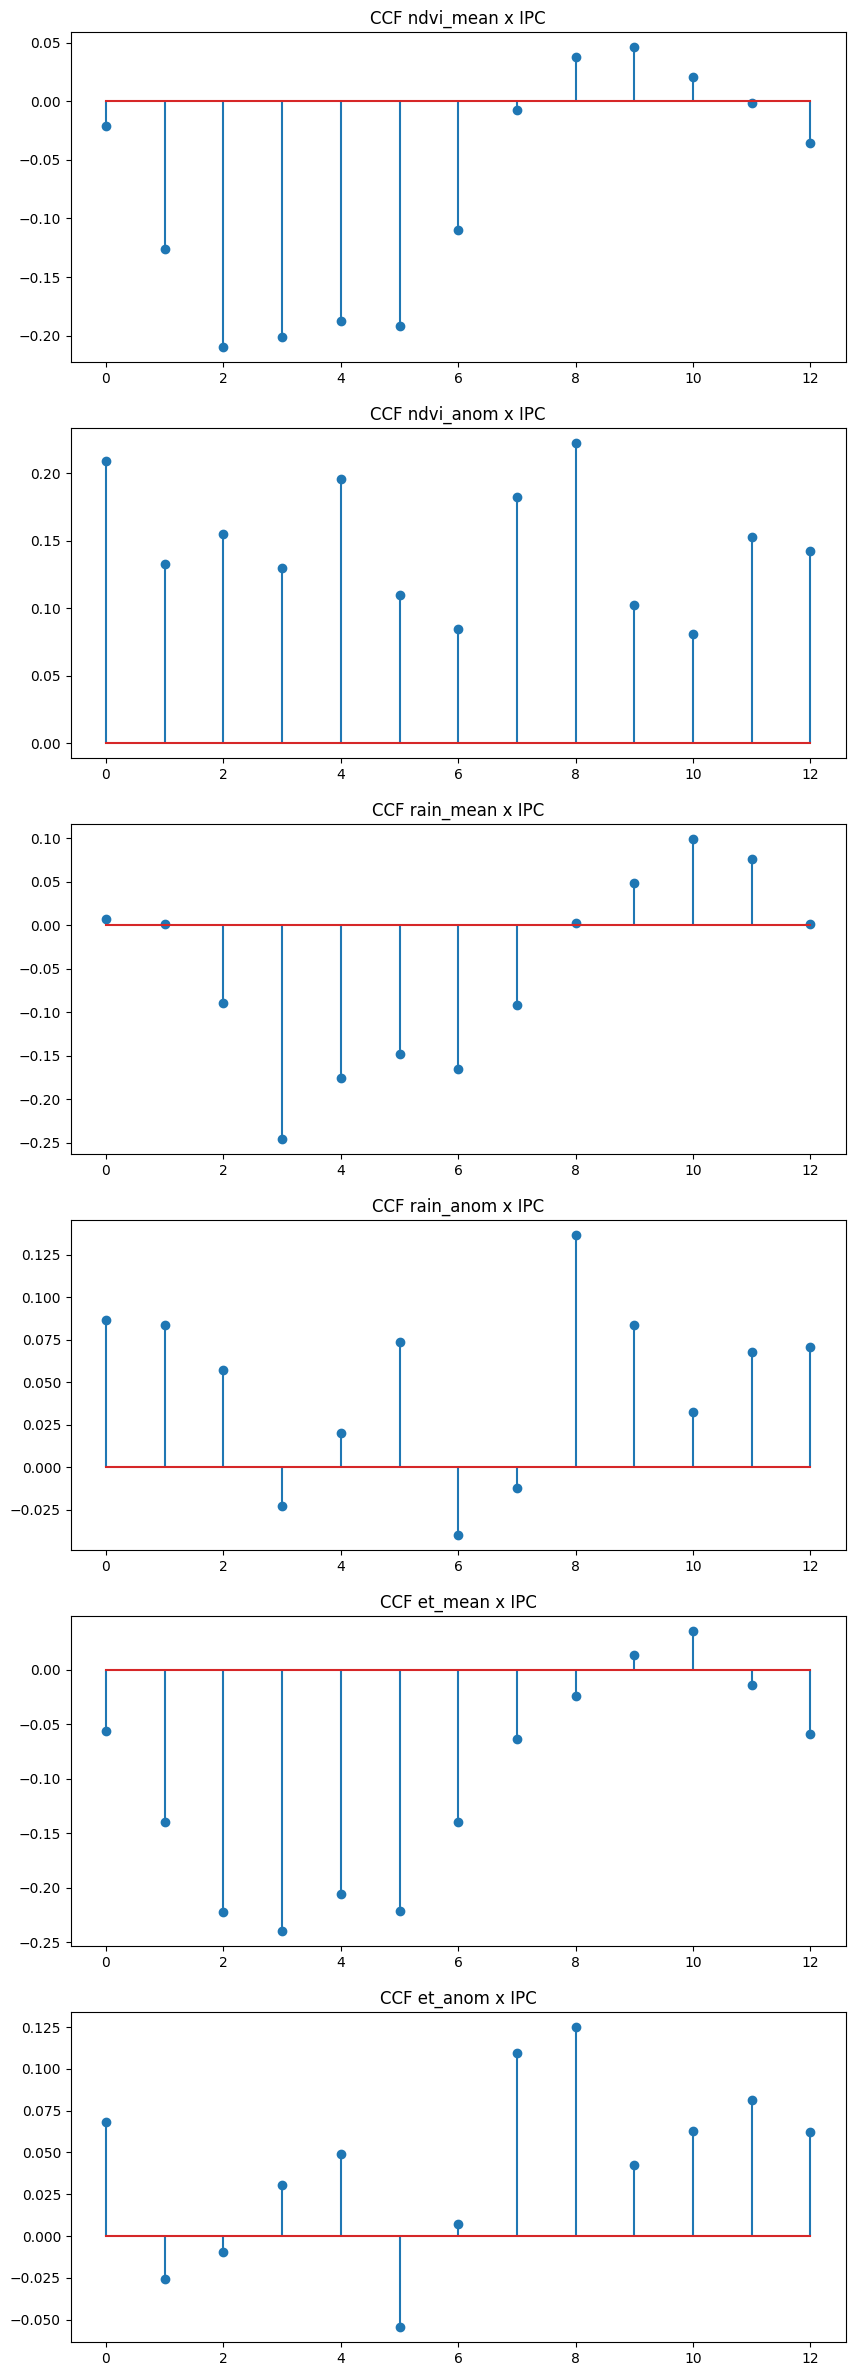

In [11]:
#plot ccf 
correlation = correlation.T
fig, axs = plt.subplots(len(lag_columns),1, figsize=(10,30))
i=0
for variable in lag_columns:
    axs[i].stem(correlation[variable])
    axs[i].title.set_text(f"CCF {variable} x IPC")
    i=i+1

OLS Model

In [12]:
from statsmodels.regression.linear_model import OLS

In [41]:
df.iloc[:,[13, 2, 21, 52, 23, 54]]
#df.iloc[:,1:37]

,,ndvi_mean_lag2,ndvi_anom_lag0,rain_mean_lag3,rain_anom_lag8,et_mean_lag3,et_anom_lag8
date,district_code,,,,,,
2009-07-01,74,0.493882,82.73602,20.585710,-2.581531,12.468240,-5.897221
2009-10-01,74,0.635694,100.22870,13.686190,0.201140,14.027670,0.059724
2010-01-01,74,0.472371,83.79816,11.130940,-10.788640,18.347970,6.342342
2010-04-01,74,0.220465,76.68565,0.293134,-12.566300,0.167976,-5.052566
2010-07-01,74,0.338209,95.05682,7.614567,-4.467705,1.413454,-5.234680
...,...,...,...,...,...,...,...
2018-10-01,151,0.752058,109.45600,21.637550,0.011295,26.819780,0.023117
2019-02-01,151,0.316091,99.63349,0.896198,2.766007,1.886458,6.667993
2019-06-01,151,0.235807,114.87210,0.547766,-0.286235,0.027258,-1.224320
